In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
delivery=pd.read_csv(r"C:\Data Science Assignments\Basics Statistis 1\simple linear regression\delivery_time.csv")

## Exploratory Data Analysis(EDA)

In [3]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
delivery.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [5]:
delivery.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
delivery.describe(include='all')

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

###  Log Transformation

In [9]:
print(delivery.columns)


Index(['Delivery Time', 'Sorting Time'], dtype='object')


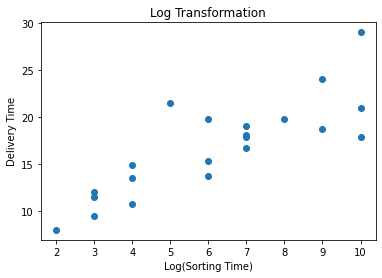

In [10]:
delivery['Sorting Time_log']= np.log(delivery['Sorting Time'])

plt.scatter(delivery['Sorting Time'],delivery['Delivery Time'])
plt.xlabel('Log(Sorting Time)')
plt.ylabel('Delivery Time')
plt.title('Log Transformation')
plt.show()

In [11]:
model_log = LinearRegression()
model_log.fit(delivery[['Sorting Time_log']], delivery['Delivery Time'])
print(f'Intercept: {model_log.intercept_}')
print(f'Coefficient: {model_log.coef_}')

Intercept: 1.1596835115465645
Coefficient: [9.04341346]


### Square Root (sqrt) Transformation

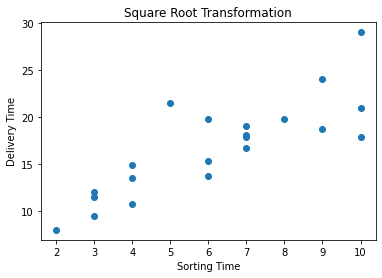

Intercept: 6.58273397199706
Coefficient: [1.6490199]


In [12]:

delivery['Sorting Time_sqrt'] = np.sqrt(delivery['Sorting Time'])

# Create a scatter plot of the transformed data
plt.scatter(delivery['Sorting Time'], delivery['Delivery Time'])
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Square Root Transformation')
plt.show()

# Perform linear regression
model_sqrt = LinearRegression()
model_sqrt.fit(delivery[['Sorting Time']], delivery['Delivery Time'])
print(f'Intercept: {model_sqrt.intercept_}')
print(f'Coefficient: {model_sqrt.coef_}')


###  Square (sq) Transformation

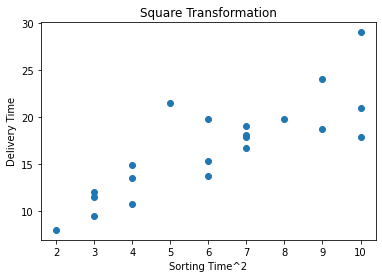

Intercept: 6.58273397199706
Coefficient: [1.6490199]


In [13]:
delivery['Sorting Time_sq'] = np.square(delivery['Sorting Time'])

# Create a scatter plot of the transformed data
plt.scatter(delivery['Sorting Time'], delivery['Delivery Time'])
plt.xlabel('Sorting Time^2')
plt.ylabel('Delivery Time')
plt.title('Square Transformation')
plt.show()

# Perform linear regression
model_sq = LinearRegression()
model_sq.fit(delivery[['Sorting Time']], delivery['Delivery Time'])
print(f'Intercept: {model_sq.intercept_}')
print(f'Coefficient: {model_sq.coef_}')

#### Replacing missing values

In [16]:
## replace with mean, median, number

In [17]:
delivery

,Delivery Time,Sorting Time,Sorting Time_log,Sorting Time_sqrt,Sorting Time_sq,Log_Delivery_Time,Sqrt_Sorting_Time,Sq_Delivery_Time
0,21.00,10,2.302585,3.162278,100,3.044522,3.162278,441.0000
1,13.50,4,1.386294,2.000000,16,2.602690,2.000000,182.2500
2,19.75,6,1.791759,2.449490,36,2.983153,2.449490,390.0625
3,24.00,9,2.197225,3.000000,81,3.178054,3.000000,576.0000
4,29.00,10,2.302585,3.162278,100,3.367296,3.162278,841.0000
5,15.35,6,1.791759,2.449490,36,2.731115,2.449490,235.6225
6,19.00,7,1.945910,2.645751,49,2.944439,2.645751,361.0000
7,9.50,3,1.098612,1.732051,9,2.251292,1.732051,90.2500
8,17.90,10,2.302585,3.162278,100,2.884801,3.162278,320.4100
9,18.75,9,2.197225,3.000000,81,2.931194,3.000000,351.5625


####  Removing outliers

In [18]:
delivery

,Delivery Time,Sorting Time,Sorting Time_log,Sorting Time_sqrt,Sorting Time_sq,Log_Delivery_Time,Sqrt_Sorting_Time,Sq_Delivery_Time
0,21.00,10,2.302585,3.162278,100,3.044522,3.162278,441.0000
1,13.50,4,1.386294,2.000000,16,2.602690,2.000000,182.2500
2,19.75,6,1.791759,2.449490,36,2.983153,2.449490,390.0625
3,24.00,9,2.197225,3.000000,81,3.178054,3.000000,576.0000
4,29.00,10,2.302585,3.162278,100,3.367296,3.162278,841.0000
5,15.35,6,1.791759,2.449490,36,2.731115,2.449490,235.6225
6,19.00,7,1.945910,2.645751,49,2.944439,2.645751,361.0000
7,9.50,3,1.098612,1.732051,9,2.251292,1.732051,90.2500
8,17.90,10,2.302585,3.162278,100,2.884801,3.162278,320.4100
9,18.75,9,2.197225,3.000000,81,2.931194,3.000000,351.5625


<AxesSubplot:>

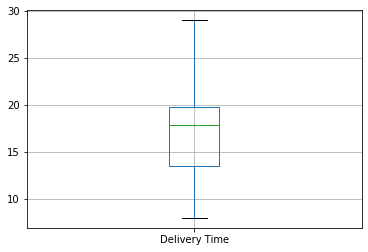

In [19]:
delivery.boxplot(column='Delivery Time')

In [20]:
y= delivery[['Delivery Time']]
x= delivery['Sorting Time']

In [21]:
x

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

In [22]:
y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

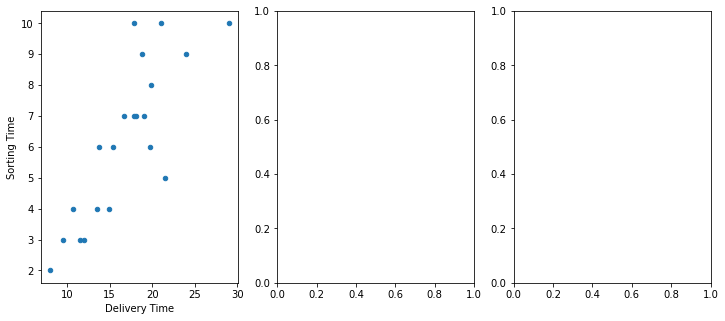

In [23]:
fig,axs=plt.subplots(1,3)
delivery.plot(kind='scatter',x='Delivery Time',y='Sorting Time',ax=axs[0],figsize=(12,5))

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=10)

In [25]:
x_train

19     7
6      7
12     7
17     7
20     5
8     10
10     8
1      4
13     3
16     6
0     10
15     4
4     10
9      9
Name: Sorting Time, dtype: int64

In [26]:
y_train

,Delivery Time
19,17.83
6,19.00
12,16.68
17,18.11
20,21.50
8,17.90
10,19.83
1,13.50
13,11.50
16,13.75


In [27]:
y_test

,Delivery Time
14,12.03
5,15.35
2,19.75
11,10.75
7,9.50
18,8.00
3,24.00


In [28]:
x_test

14    3
5     6
2     6
11    4
7     3
18    2
3     9
Name: Sorting Time, dtype: int64

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14,)
(14, 1)
(7,)
(7, 1)


In [30]:
lin_model= LinearRegression()


In [31]:
lin_model

LinearRegression()

In [32]:
print(delivery.describe())


       Delivery Time  Sorting Time  Sorting Time_log  Sorting Time_sqrt  \
count      21.000000     21.000000         21.000000          21.000000   
mean       16.790952      6.190476          1.728470           2.433008   
std         5.074901      2.542028          0.467979           0.533381   
min         8.000000      2.000000          0.693147           1.414214   
25%        13.500000      4.000000          1.386294           2.000000   
50%        17.830000      6.000000          1.791759           2.449490   
75%        19.750000      8.000000          2.079442           2.828427   
max        29.000000     10.000000          2.302585           3.162278   

       Sorting Time_sq  Log_Delivery_Time  Sqrt_Sorting_Time  Sq_Delivery_Time  
count        21.000000          21.000000          21.000000         21.000000  
mean         44.476190           2.774787           2.433008        306.464290  
std          32.265491           0.318219           0.533381        181.908545  


### Pairplot and visualization relationship

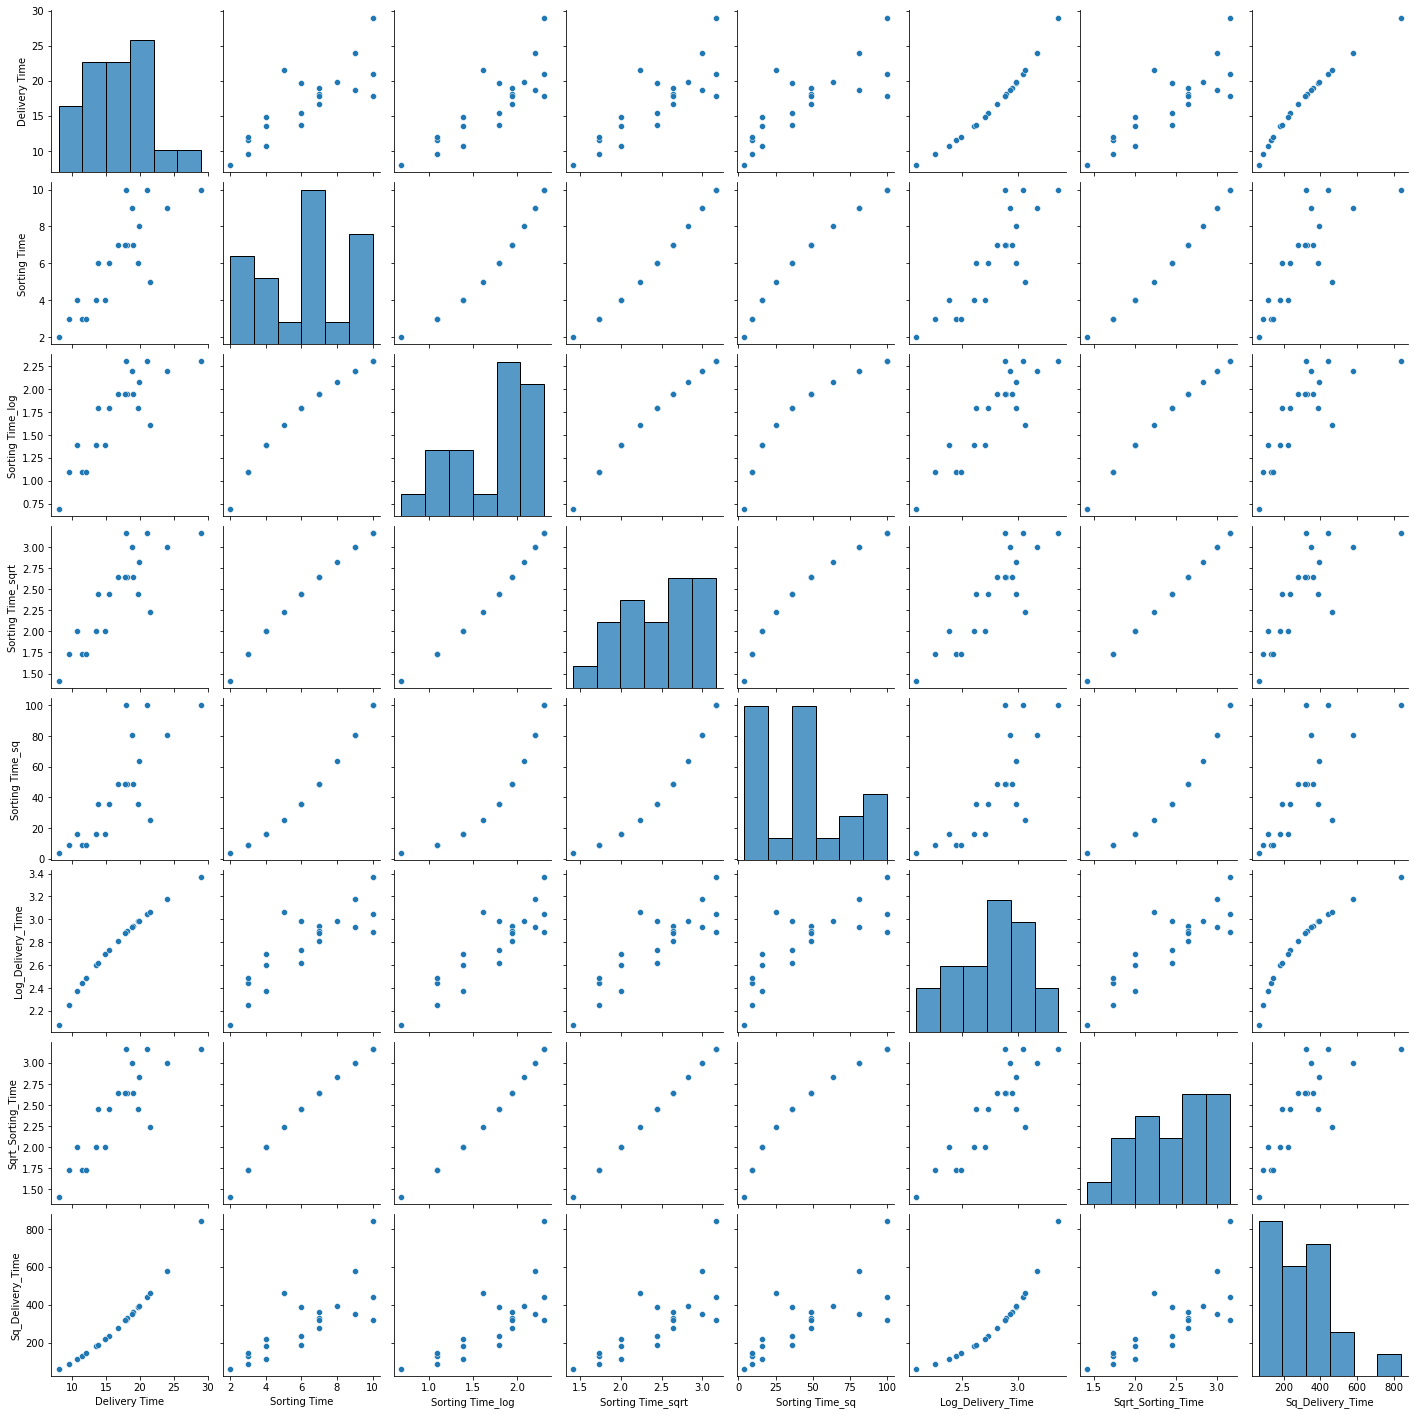

In [33]:
sns.pairplot(delivery)
plt.show()


### Histograms for distribution:

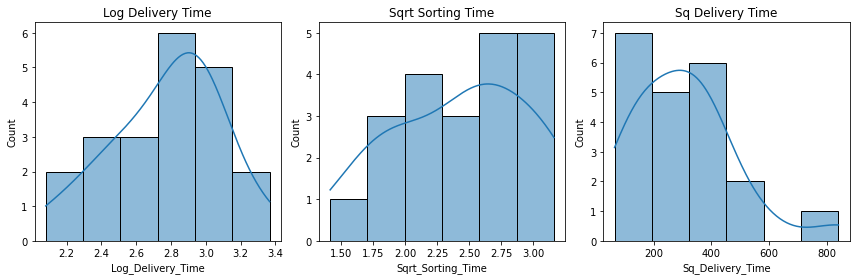

In [34]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(delivery['Log_Delivery_Time'], kde=True)
plt.title('Log Delivery Time')

plt.subplot(132)
sns.histplot(delivery['Sqrt_Sorting_Time'], kde=True)
plt.title('Sqrt Sorting Time')

plt.subplot(133)
sns.histplot(delivery['Sq_Delivery_Time'], kde=True)
plt.title('Sq Delivery Time')

plt.tight_layout()
plt.show()


###  Scatter plot to visualize relationships:

In [36]:
delivery.columns


Index(['Delivery Time', 'Sorting Time', 'Sorting Time_log',
       'Sorting Time_sqrt', 'Sorting Time_sq', 'Log_Delivery_Time',
       'Sqrt_Sorting_Time', 'Sq_Delivery_Time'],
      dtype='object')

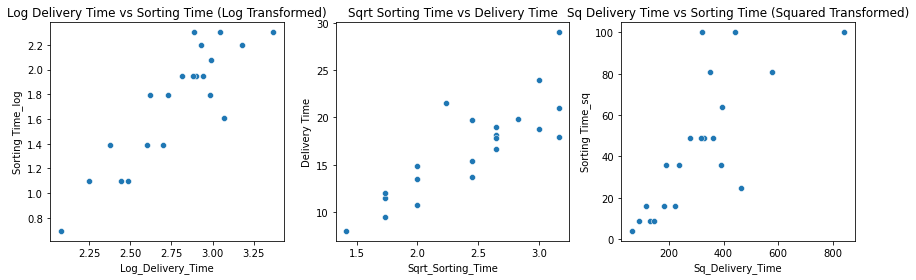

In [39]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.scatterplot(x='Log_Delivery_Time', y='Sorting Time_log', data=delivery)
plt.title('Log Delivery Time vs Sorting Time (Log Transformed)')

plt.subplot(132)
sns.scatterplot(x='Sqrt_Sorting_Time', y='Delivery Time', data=delivery)
plt.title('Sqrt Sorting Time vs Delivery Time')

plt.subplot(133)
sns.scatterplot(x='Sq_Delivery_Time', y='Sorting Time_sq', data=delivery)
plt.title('Sq Delivery Time vs Sorting Time (Squared Transformed)')

plt.tight_layout()
plt.show()
